**Teste Revelo - Google Job Skills**

![alt text](https://o.aolcdn.com/images/dims?quality=85&image_uri=https%3A%2F%2Fo.aolcdn.com%2Fhss%2Fstorage%2Fmidas%2F17f4b60aec299f212a456632b2311c5e%2F202565129%2Fgoogle-1200-2.jpg&client=amp-blogside-v2&signature=023ec72972e3441e555753bc4a1965a92ea96ac8)

Questões a serem respondidas no teste:

1. Quais são os países com mais vagas anunciadas pela Google? Como você construiria um gráfico que demonstre o resultado da contagem?

2. Qual o número de vagas oferecidas para o Brasil?

3. Quais são as qualificações mínimas e desejáveis que o Google mais exige?

4. Quais skills de programação são mais pedidas nas vagas do Google?

5. Se você tivesse um amigo que sonha se candidatar a uma vaga no Google, que habilidades e skills você falaria para ele se desenvolver e que dicas você daria para ele? Construa um raciocínio com base nos dados que comprove seus argumentos.

6. Se você quisesse montar um sistema de recomendação para a Google achar candidatos, que outras informações além dessas você adicionaria no dataset para melhorar o match com os candidatos?

Aqui segue a parte introdutória e básica, a importaçao dos módulos necessários e carregamento da base de dados.

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot') # Tentei outros estilos de plot, mas este foi o melhor

PATH = '/content/drive/My Drive/colab_apps/datasets/'

In [0]:
dataset = pd.read_excel(PATH + 'job_skills.xlsx')

Checagem das dimensões do dataset.

In [0]:
rows, cols = dataset.shape
print('Número de amostras: {}'.format(rows))
print('Número de atributos: {}'.format(cols))
print('\n')
dataset.head(3)

Número de amostras: 1250
Número de atributos: 7




,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...


Como as questões abordam apenas as vagas ofertadas pelo Google, checarei se o Google é a única empresa a aparecer no dataset.

In [0]:
dataset.Company.unique()

array(['Google', 'YouTube'], dtype=object)

O dataset possui o YouTube como empresa, apesar de ser parte da familia Google, as amostras do YouTube serão removidas, para que os resultados sejam apenas do Google.

In [0]:
dataset = dataset[dataset.Company != 'YouTube']

O dataset possui duas colunas com espaço nos seus nomes, isso não é uma boa prática desde que eu posso necessitar utilizar essas colunas para ver seus valores em formato de séries, como 'value_counts', isso leva a erro, então substituirei o espaço em branco nos nomes por '_'.

In [0]:
dataset = dataset.rename(columns={'Minimum Qualifications': 'Minimum_Qualifications', 
                        'Preferred Qualifications': 'Preferred_Qualifications'})
dataset.head(2)

,Company,Title,Category,Location,Responsibilities,Minimum_Qualifications,Preferred_Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."


Uma vez que possuo o dataset organizado, hora de checar quais os tipos de variáveis e o uso de memória.

In [0]:
dataset.dtypes

Company                     object
Title                       object
Category                    object
Location                    object
Responsibilities            object
Minimum_Qualifications      object
Preferred_Qualifications    object
dtype: object

In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1227 entries, 0 to 1249
Data columns (total 7 columns):
Company                     1227 non-null object
Title                       1227 non-null object
Category                    1227 non-null object
Location                    1227 non-null object
Responsibilities            1212 non-null object
Minimum_Qualifications      1213 non-null object
Preferred_Qualifications    1213 non-null object
dtypes: object(7)
memory usage: 76.7+ KB


O dataset possui apenas valores categóricos, por ora não há necessidade de aplicar um label encoder ou one hot encoding, as questões tratam de NLP.
Hora de analisar se existem dados não catalogados em algum atributo.

In [0]:
dataset.isnull().sum()

Company                      0
Title                        0
Category                     0
Location                     0
Responsibilities            15
Minimum_Qualifications      14
Preferred_Qualifications    14
dtype: int64

Nota-se que existem dados faltantes em 'Responsabilities', 'Minimum_Qualifications' e 'Preferred_Qualifications ', porém ainda não será feita a remoção deles, uma vez que as primeras questões usam apenas as informações contidas em 'Location', a qual possui dados em todas as amostras.

# Resolução das Questões


### 1. Quais são os países com mais vagas anunciadas pela Google? Como você construiria um gráfico que demonstre o resultado da contagem?

In [0]:
# Extrair apenas a informação 'Country' de cada localidade
dataset['Country'] = dataset['Location'].apply(lambda x : x.split(',')[-1])

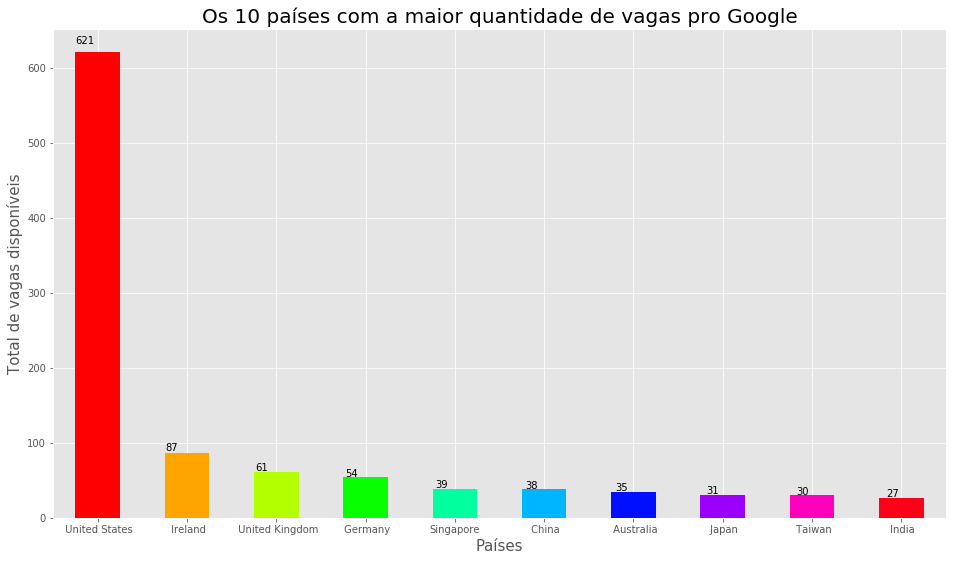

In [0]:
plt.rcParams['figure.figsize'] = (16, 9)
color = plt.cm.hsv(np.linspace(0, 1, 10))
ax = dataset['Country'].value_counts().sort_values(ascending = False).head(10).plot.bar(color = color, rot=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.009, p.get_height() * 1.018))
plt.title("Os 10 países com a maior quantidade de vagas pro Google", fontsize = 20)
plt.xlabel('Países', fontsize = 15)
plt.ylabel('Total de vagas disponíveis', fontsize = 15)
plt.show()

### 2. Qual o número de vagas oferecidas para o Brasil?

In [0]:
br_count = (dataset[dataset.Country == ' Brazil'].shape[0])
print('O Brasil possui {} vagas disponíveis para o Google.'.format(br_count))

O Brasil possui 15 vagas disponíveis para o Google.


E agora uma informação adicional: O quanto as vagas no Brasil representam em porcentagem em relação aos 15 maiores países do mundo quanto a vagas disponíveis?
O resultado segue no gráfico abaixo.

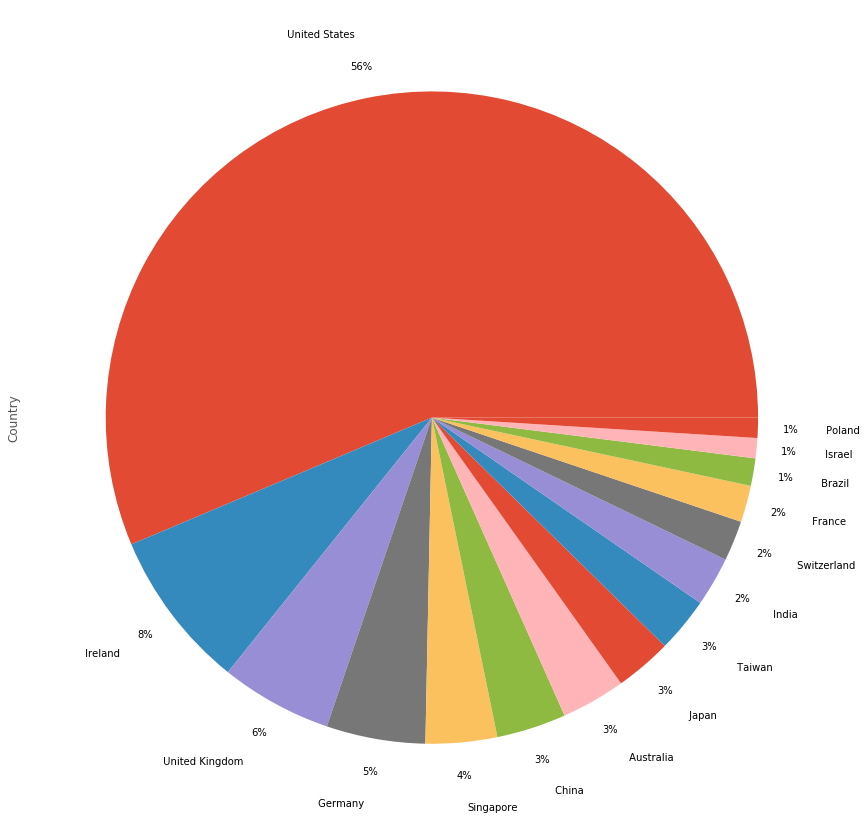

In [0]:
dataset.Country.value_counts().head(15).plot(kind='pie', figsize=(15, 15), autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2);

Com isso percebe-se que apenas 1% das vagas distribuídas paras esses países destina-se ao Brasil.

### 3. Quais são as qualificações mínimas e desejáveis que o Google mais exige?

Para responder esta questão é necessário o uso de algum módulo de NLP, no caso utilizarei o módulo nltk.
Primeiro, o import do módulo e o download das stopwords e punkt.

In [0]:
import nltk
nltk.download("stopwords") 
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Para esta tarefa, é necessário exlcuir as amostras com valores nulos, pois estas se encontram justamente nos atributos referentes as qualificações.

In [0]:
dataset_clean = dataset.dropna()

Agora, os processos típicos de NLP, tokenização e remoção das stopwords.

In [0]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

stop_words = set(stopwords.words('english')) 

# Qualificações Minimas
dataset_clean['Minimum_Qualifications'] = dataset_clean.Minimum_Qualifications.apply(lambda x: word_tokenize(x))
dataset_clean['Minimum_Qualifications'] = dataset_clean.Minimum_Qualifications.apply(lambda x: [w for w in x if w not in stop_words])
dataset_clean['Minimum_Qualifications'] = dataset_clean.Minimum_Qualifications.apply(lambda x: ' '.join(x))

# Qualificações Desejáveis
dataset_clean['Preferred_Qualifications'] = dataset_clean.Preferred_Qualifications.apply(lambda x: word_tokenize(x))
dataset_clean['Preferred_Qualifications'] = dataset_clean.Preferred_Qualifications.apply(lambda x: [w for w in x if w not in stop_words])
dataset_clean['Preferred_Qualifications'] = dataset_clean.Preferred_Qualifications.apply(lambda x: ' '.join(x))

E um dado importante a ser extraído, os anos mínimos de experiência exigidos pelo Google para os cargos.

In [0]:
import re
dataset_clean['Minimum_Years_Experience'] = dataset_clean['Minimum_Qualifications'].apply(lambda x : re.findall(r'([0-9]+) year',x))
# Fill empty list with [0]
dataset_clean['Minimum_Years_Experience'] = dataset_clean['Minimum_Years_Experience'].apply(lambda y : [0] if len(y)==0 else y)
#Then extract maximum in the list to have the work experience requirement
dataset_clean['Minimum_Years_Experience'] = dataset_clean['Minimum_Years_Experience'].apply(lambda z : max(z))
dataset_clean['Minimum_Years_Experience'] = dataset_clean.Minimum_Years_Experience.astype(int)

Uma vez que possuo o texto analisado, hora de checar a Wordcloud e ver quais termos aparecem mais, primeiro para os qualificações mínimas, observando os 50 termos que mais aparecem.

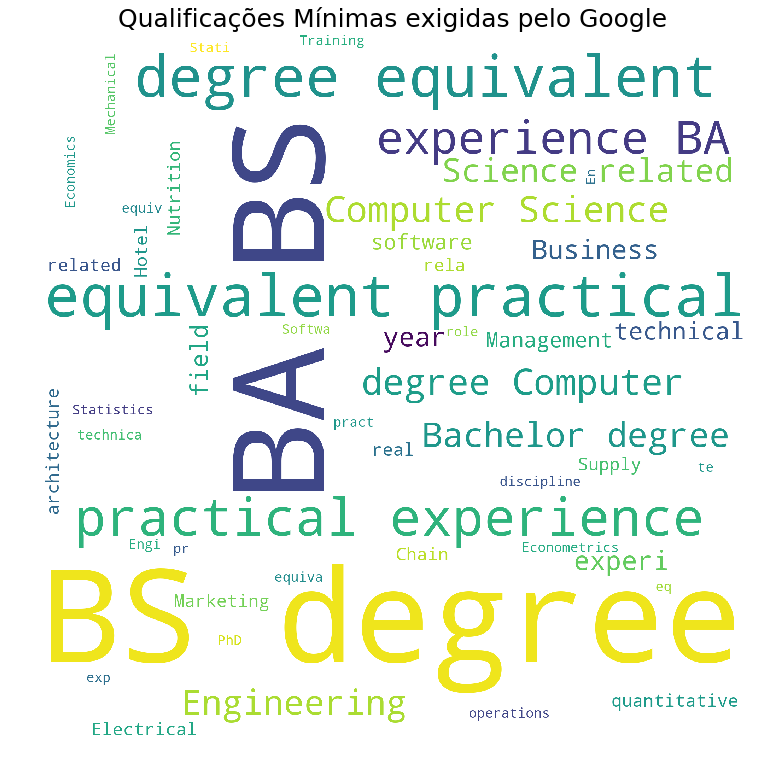

In [0]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white',
                      max_words = 50,
                      width = 2000,
                      height = 2000).generate(str(dataset_clean['Minimum_Qualifications']))

plt.rcParams['figure.figsize'] = (13, 13)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Qualificações Mínimas exigidas pelo Google', fontsize = 25)
plt.show()

Conclui-se pela Wordcloud que bacharelados, seja em engenharia ou computação, conhecimento científico, conhecimento prático, e experiência relacionada a área, aparecem costantemente entre as qualificações mínimas. Importante notar que econometria e marketing aparecem entre os requisitos mínimos, mas em uma quantidade menor de vezes.

Agora, as qualificações desejáveis.

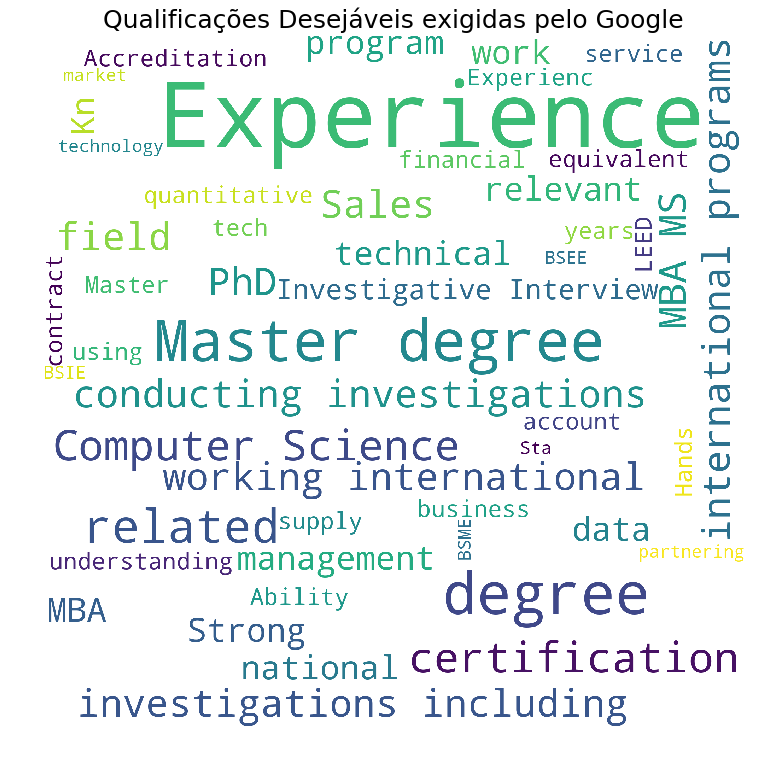

In [0]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white',
                      max_words = 50,
                      width = 2000,
                      height = 2000).generate(str(dataset_clean['Preferred_Qualifications']))

plt.rcParams['figure.figsize'] = (13, 13)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Qualificações Desejáveis exigidas pelo Google', fontsize = 25)
plt.show()

Conclui-se que pós-graduações (Mestrado e Doutorado), MBA, Ciência da Computação, experiência relatada quanto ao cargo, uma boa conduta em investigar o problema, e trabalhar internacionalmente, estão entre os requisitos desejáveis pelo Google.

Um dado extra para enriquecer a análise: E quanto aos anos de experiência, o que o Google exige?

In [0]:
dataset_clean['Minimum_Years_Experience'].describe()

count    1212.000000
mean        2.842409
std         3.301640
min         0.000000
25%         0.000000
50%         2.000000
75%         5.000000
max        15.000000
Name: Minimum_Years_Experience, dtype: float64

Pelos dados apresentados, nota-se que o Google requer um média de cerca de 3 anos mínimos de experiência para os seus cargos, onde alguns sequer pedem anos de experiência e outros até 15 anos de experiência.

### 4. Quais skills de programação são mais pedidas nas vagas do Google?

Para ajudar a responder essa pergunta, achei melhor consultar um artigo do IEEE com o ranking deles quanto as linguagens de programação: https://spectrum.ieee.org/computing/software/the-top-programming-languages-2019

No artigo o IEEE usa uma métrica própria, e entre as 10 citadas, farei apenas uma mudança, substituirei o C++ por SQL.

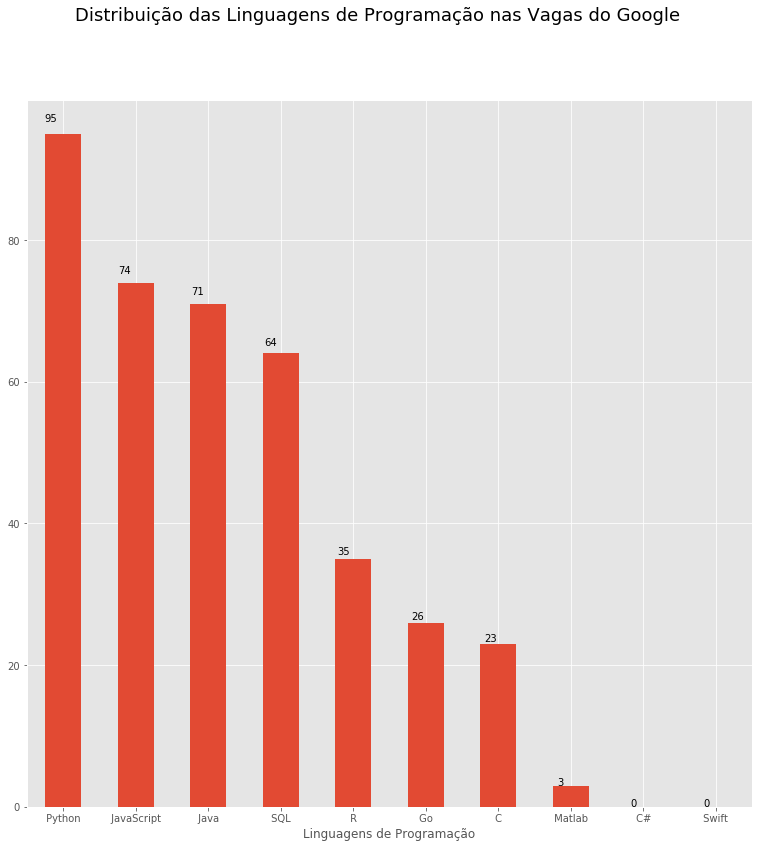

In [0]:
from string import punctuation
set(punctuation)
# Seguindo o Rank do IEEE
Programming_Languages = [' Python ', ' Java ', ' C ', ' C# ', ' SQL ', ' R ', ' JavaScript ' , ' Matlab ', ' Swift ', ' Go ']

Languages = dict((x,0) for x in Programming_Languages)
for i in Languages:
    x = dataset_clean['Minimum_Qualifications'].str.contains(i).sum()
    if i in Languages:
        Languages[i] = x
# Resultados
languages_requirement = sorted(Languages.items(), key=lambda x: x[1], reverse=True)
language = pd.DataFrame(languages_requirement,columns=['Language','Count'])
language['Count'] = language.Count.astype('int')
# Plots
ax = language.plot.bar(x='Language',y='Count', legend=False, rot = 0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.009, p.get_height() * 1.018))
plt.suptitle('Distribuição das Linguagens de Programação nas Vagas do Google', fontsize=18);
plt.xlabel('Linguagens de Programação');

Nota-se pelas linguagens listadas que as cinco mais requisitadas pelo Google são respectivamente: Python, JavaScript, Java, SQL e R.

Linguagens como C# e Swift sequer entraram nos requisitos do Google.

### 5. Se você tivesse um amigo que sonha se candidatar a uma vaga no Google, que habilidades e skills você falaria para ele se desenvolver e que dicas você daria para ele? Construa um raciocínio com base nos dados que comprove seus argumentos.

Pelos dados apresentados, eu diria para ele investir em educação superior e obter um bacharelado em algum curso relacionado a área de computação, além de investir em cursos de pós-graduação, como mestrado e doutorado.

Ter um bom conhecimento prático e experiência com a área envolvida no cargo.

Procurar estágio na área para obter anos de experiência, já que a média exigida pelo Google é cerca de 3 anos.

E focar na questão de desenvolvimento em uma das cinco linguagens de programação mais requisitadas pelo Google: Python, JavaScript, Java, SQL e R.

### 6. Se você quisesse montar um sistema de recomendação para a Google achar candidatos, que outras informações além dessas você adicionaria no dataset para melhorar o match com os candidatos?

Eu tentaria derivar melhor alguns campos em outros atributos, como foi feito aqui quanto aos anos minimos de experiência.

Uma informação que considero útil para melhorar o match com os candidatos seria adicionar em quais projetos ele já trabalhou, seja uma competição do Kaggle ou contribuição em algum repositório Open Source no Github.

Outra forma bastante interessante para melhorar esse match seria saber se o candidato tem algum feedback em relação a produtos da empresa, se ele gosta do produto e como ele poderia melhorá-lo, uma informação dessa traria um candidato mais determinado a trabalhar com certo produto da empresa.